# Sales Prediction using Python

## Importing Necessary Files

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats


## Importing Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Oasis/Task3_DS/

/content/drive/MyDrive/Oasis/Task3_DS


In [4]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Preprocessing and cleaning

In [7]:
# print("Number of Null Values: ",df.isnull().sum().sum())
# 0 Null Values

df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## Exploratory Data Analysis (EDA)

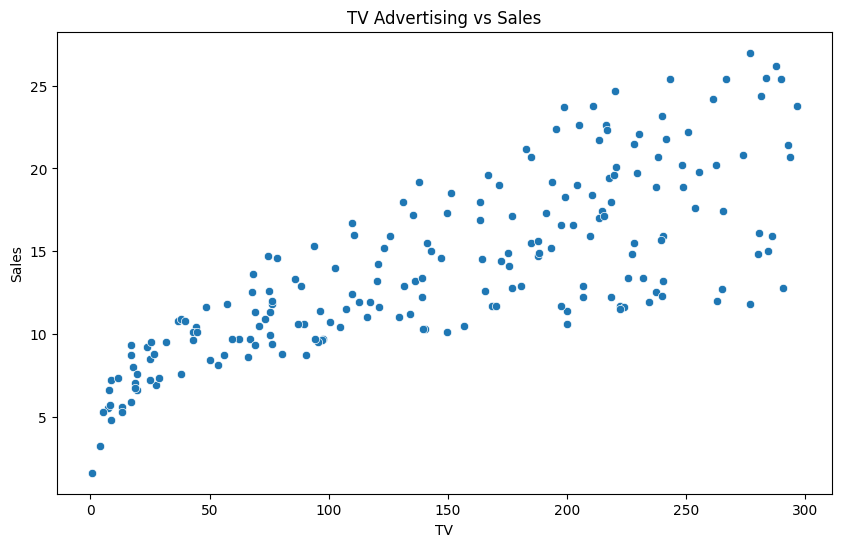

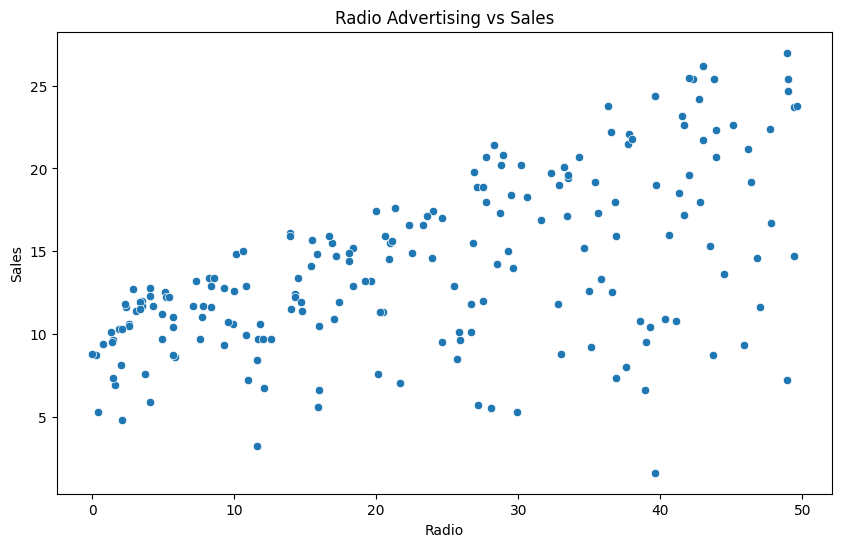

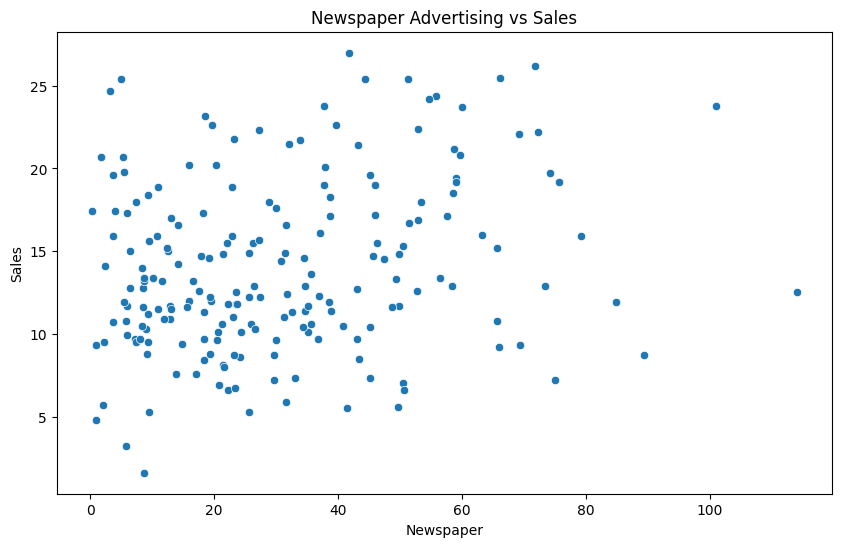

In [8]:
# Scatter plot for TV vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV Advertising vs Sales')
plt.show()

# Scatter plot for Radio vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title('Radio Advertising vs Sales')
plt.show()

# Scatter plot for Newspaper vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title('Newspaper Advertising vs Sales')
plt.show()

1. TV Advertising vs Sales: There is a clear positive linear relationship between TV advertising and sales. As TV advertising spending increases, sales tend to increase in a linear fashion.

2. Radio Advertising vs Sales: There is also a positive relationship between Radio advertising and sales, though it is not as strongly linear as the TV advertising. It shows a scattered trend with a positive correlation.

3. Newspaper Advertising vs Sales: The relationship between Newspaper advertising and sales is less clear. The points are more scattered, indicating that newspaper advertising may not have a strong or linear influence on sales.

## Correlation Analysis

            Unnamed: 0        TV     Radio  Newspaper     Sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
Radio        -0.110680  0.054809  1.000000   0.354104  0.576223
Newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
Sales        -0.051616  0.782224  0.576223   0.228299  1.000000


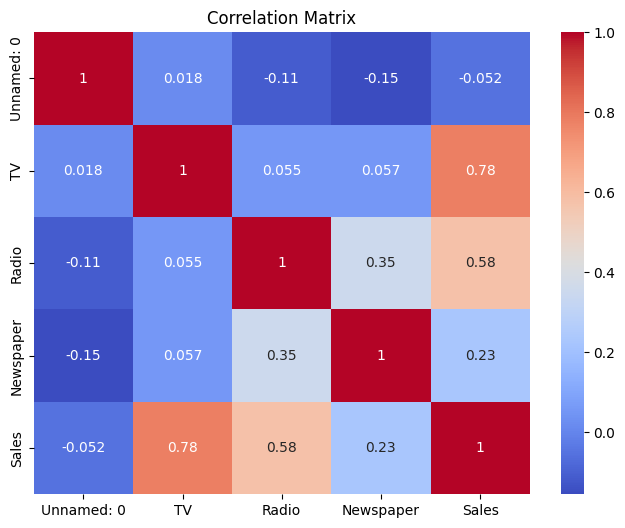

In [9]:
corr_matrix = df.corr()

# Display the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

1. TV and Sales (0.78): There is a strong positive correlation between TV advertising and Sales, which aligns with the scatter plot we saw earlier. This suggests that TV advertising is a significant factor in driving sales.
2. Radio and Sales (0.58): Radio advertising also shows a moderately strong positive correlation with Sales. While not as strong as TV, Radio advertising is still a relevant factor.
3. Newspaper and Sales (0.23): Newspaper advertising has a weak positive correlation with Sales, indicating that it has less influence on driving sales compared to TV and Radio.

## Split the Data for Training and Testing

In [12]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (160, 3)
Testing set size: (40, 3)


## Model Selection and Training

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 3.1740973539761033
R² Score: 0.899438024100912


1. Mean Squared Error (MSE): 3.17 — This tells us how much the predicted sales values differ from the actual sales values on average. A lower MSE indicates a better fit, and in this case, the error is reasonably low.

2. R² Score: 0.899 — This indicates that 89.9% of the variance in the sales data is explained by the model. The closer the R² score is to 1, the better the model fits the data, so this is a very strong result.

## Model Coefficients

In [15]:
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Model Coefficients: [0.04472952 0.18919505 0.00276111]
Intercept: 2.979067338122629


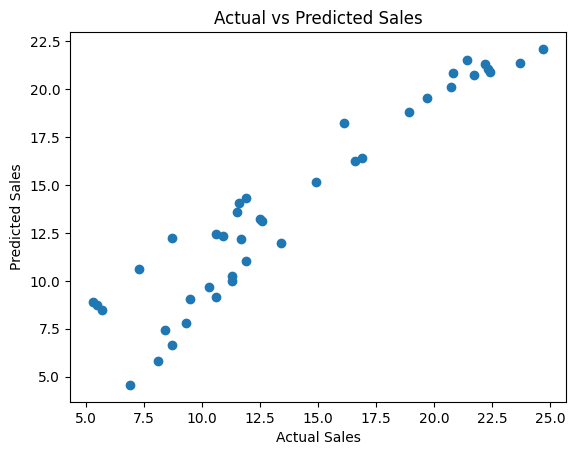

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

1. TV Coefficient (0.0447): For every unit increase in TV advertising expenditure, sales are predicted to increase by approximately 0.0447 units, assuming the other variables remain constant.

2. Radio Coefficient (0.1892): For every unit increase in Radio advertising expenditure, sales are predicted to increase by approximately 0.1892 units, which suggests that Radio advertising has a more significant impact on sales compared to TV and Newspaper.

3. Newspaper Coefficient (0.0028): For every unit increase in Newspaper advertising expenditure, sales increase by approximately 0.0028 units. This coefficient is much smaller, indicating that Newspaper advertising has a minimal effect on sales compared to TV and Radio.

*Insights*
1. Radio has the highest impact on sales compared to TV and Newspaper.
2. TV also has a significant impact, but it's smaller than Radio.
3. Newspaper has almost no effect on sales, which might suggest that advertising via newspapers isn't as effective in this particular case.

## Residual Analysis

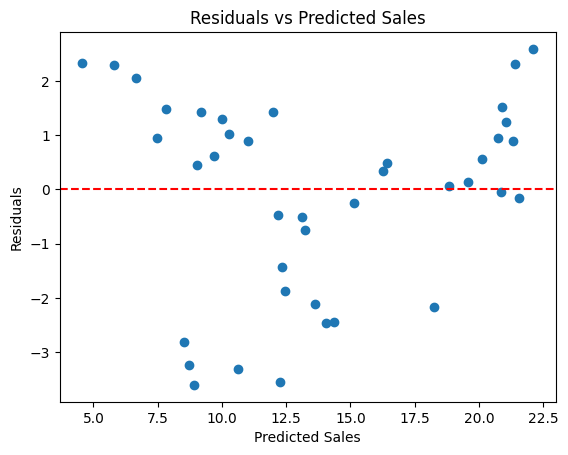

In [17]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales")
plt.show()

## Plot the Residuals vs. Fitted Values

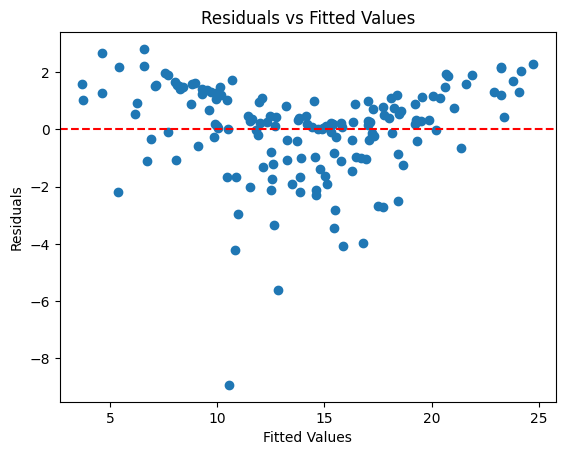

In [18]:
y_train_pred = model.predict(X_train)
residuals = y_train - y_train_pred
plt.scatter(y_train_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

## Histogram of Residuals

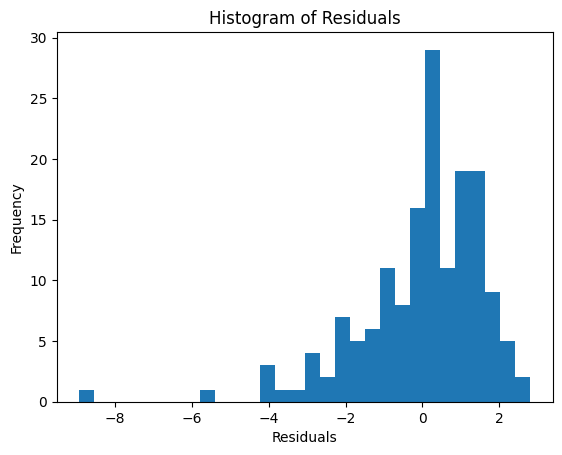

In [19]:
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

## Q-Q Plot

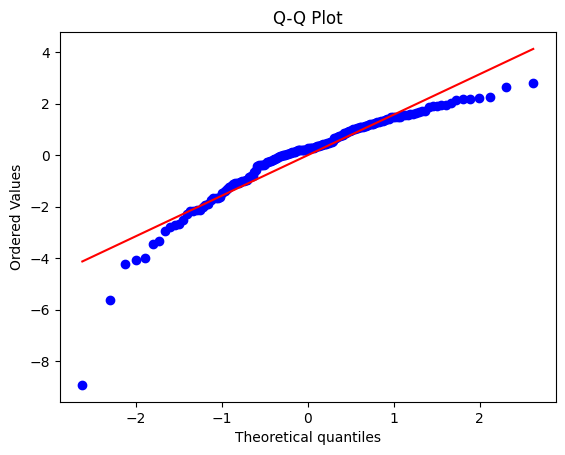

In [21]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

## We can conclude the following:
1. Impact of Advertising on Sales:

* The strongest predictor of sales is the TV advertising budget, which has the highest correlation with sales and a significant coefficient (0.0447).
* Radio advertising also positively affects sales, though not as strongly as TV advertising, with a coefficient of 0.1892.
* Newspaper advertising, interestingly, has a much smaller influence on sales (coefficient of 0.0027), indicating that spending on newspapers does not significantly drive sales in this dataset.

2. Model Performance:

* The R² score of 0.899 indicates that the model explains about 90% of the variance in the sales data. This suggests the linear regression model is a good fit for predicting sales based on the advertising budget.
* The Mean Squared Error (MSE) of 3.17 suggests that, on average, the squared differences between the actual and predicted sales are relatively low, confirming the model's effectiveness.

3. Intercept and Coefficients:
* The intercept of 2.979 suggests that even with no investment in advertising, a baseline level of sales (around 2.98 units) would be expected.
* The coefficients indicate how much sales would increase for each additional unit of advertising expenditure:
* For each additional unit spent on TV advertising, sales increase by approximately 0.045 units.
* For Radio advertising, sales increase by 0.189 units.
For Newspaper advertising, sales increase only by 0.003 units, suggesting minimal return.

## Author  
### Ishan Rahul Surdi